In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load CYP-drug data

In [20]:
# Load list of CYP-drug interactions
tableA = pd.read_csv('Table_A-CYP-drug_interactions.tab',sep='\t',header=0)

# Load molecular descriptors of all drugs
tableB = pd.read_csv('Table_B-Drug_molecular_descriptors.tab',sep='\t',header=0)

# Load protein features of all CYPs
tableC = pd.read_csv('Table_C-CYP_protein_features.tab',sep='\t',header=0)

# Load clean CYP-drug interactions
tableD = pd.read_csv('Table_D-CYP-drug_interactions_clean.tab',sep='\t',header=0)

# Explore data and visualize

In [12]:
# Display a summary of the CYP-drug interactions mined from SuperCYP database (Table A)
tableA.describe()

,CYP,Drug Identifier
count,1826,1826
unique,41,671
top,3A4,testosterone
freq,430,14


In [17]:
# Display the number of interactions per CYP
cyp_counts = tableA.CYP.value_counts()
cyp_counts

3A4     430
2D6     226
2C9     161
1A2     161
2C19    138
3A5     131
2C8     111
3A7      98
2E1      78
2B6      73
2A6      50
1A1      50
2C18     23
1B1      17
P450      8
19A       8
46A       6
3A43      5
4F3       4
4F2       4
11A       4
4B1       3
2J2       3
2A13      3
17A       3
11B1      3
11B2      3
4F12      2
24A       2
4A11      2
27A       2
2F1       2
21A       2
4F11      2
26A1      2
2C11      1
26B       1
2S1       1
5A1       1
39A       1
4F8       1
Name: CYP, dtype: int64

In [16]:
# Display the number of interactions per CYP
cyp_counts = tableD.CYP.value_counts()
cyp_counts

2D6     428
3A4     416
2C9     312
1A2     310
3A5     246
2C8     214
3A7     186
1A1     147
2B6     140
2C19    136
2E1      75
2A6      46
Name: CYP, dtype: int64

In [ ]:
# Get list of CYPs with 50 or more interactions in the SuperCYP database
cyps_to_keep = list(cyp_counts.index)
cyps_to_keep = cyps_to_keep[0:12]
cyps_to_keep

In [ ]:
plt.plot(range(len(tableA.CYP.value_counts())),tableA.CYP.value_counts(),'-o',label='CYP-drug interactions')
plt.xlabel('CYP index')
plt.ylabel('Number of interactions')
plt.title('CYP-drug interactions ranked by number of interactions\n(1707 or 93% of interactions above threshold)')
plt.hlines(50,-1,42,colors='r',linestyles='dashed',label='50 interactions')
plt.legend()

In [134]:
tableB.head()

,Drug Identifier,PUBCHEM,SMILES,SpAbs_D,SpMax_D,SpDiam_D,SpAD_D,SpMAD_D,LogEE_D,SM1_D,...,EState_VSA10,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9
0,aminobutyric acid,119.0,C(CC(=O)O)CN,30.809534,15.404767,24.297933,30.809534,4.401362,15.404767,1.998401e-14,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,23.166667
1,acetic acid,176.0,CC(=O)O,9.291503,4.645751,6.645751,9.291503,2.322876,4.662840,1.110223e-15,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.666667
2,acetylcholin,187.0,CC(=O)OCC[N+](C)(C)C,57.334033,28.667017,44.938889,57.334033,5.733403,28.667017,-2.176037e-14,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.826667,23.840000
3,mepacrine,237.0,CCN(CC)CCCC(C)NC1=C2C=C(C=CC2=NC3=C1C=CC(=C3)C...,316.668078,158.334039,228.094541,316.668078,11.309574,158.334039,8.703869e-14,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,49.394951
4,bupropion,444.0,CC(C(=O)C1=CC(=CC=C1)Cl)NC(C)(C)C,116.958704,58.479352,87.459206,116.958704,7.309919,58.479352,1.136868e-13,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,31.340371


In [128]:
tableC.head()

,CYP-Isoform,Feature,CYP,Isoform,[G1.1.1.1],[G1.1.1.2],[G1.1.1.3],[G1.1.1.4],[G1.1.1.5],[G1.1.1.6],...,[G7.1.1.74],[G7.1.1.75],[G7.1.1.76],[G7.1.1.77],[G7.1.1.78],[G7.1.1.79],[G7.1.1.80],[G9.1],[G9.2],[G9.3]
0,11A-1,sp|P05108|CP11A_HUMAN Cholesterol side-chain c...,11A,1,6.142035,0.383877,4.990403,5.758157,5.950096,5.950096,...,0.002069,0.001763,0.003946,-0.002987,-0.003479,0.000523,-0.001404,262.864198,193.049057,179.542553
1,11A-2,sp|P05108-2|CP11A_HUMAN Isoform 2 of Cholester...,11A,2,6.611570,0.275482,6.060606,5.509642,6.887052,4.683196,...,0.004200,0.001723,0.003996,-0.004643,-0.005774,-0.000833,-0.002448,186.938272,133.588679,131.797872
2,11B1-1,"sp|P15538|C11B1_HUMAN Cytochrome P450 11B1, mi...",11B1,1,8.349901,1.192843,2.783300,6.163022,5.168986,4.771372,...,0.000030,0.001043,0.001938,-0.002150,0.001235,-0.002284,-0.001588,250.641975,182.400000,190.131206
3,11B1-2,sp|P15538-2|C11B1_HUMAN Isoform 2 of Cytochrom...,11B1,2,8.924485,1.144165,2.974828,6.407323,4.805492,4.118993,...,-0.000131,0.001729,0.001794,-0.000955,0.002158,-0.001954,-0.001511,217.074074,157.169811,164.861702
4,11B2-1,"sp|P19099|C11B2_HUMAN Cytochrome P450 11B2, mi...",11B2,1,8.548708,1.391650,2.584493,6.163022,5.168986,4.970179,...,0.001563,0.001493,0.001961,-0.001128,0.002186,-0.002752,-0.001365,248.641975,184.343396,190.854610


In [ ]:
# Merge tables A and C
df = pd.merge(tableA,tableC,on='CYP')
df.head()

In [ ]:
# Merge with table B
df = pd.merge(df,tableB,on='Drug Identifier')
del df['PUBCHEM']
del df['SMILES']
df.head()

In [ ]:
print list(df.columns)

In [ ]:
# Filter out CYP-drug pairs of CYP with less than 50 interactions
rows_to_keep = [i for i in range(len(df)) if df['CYP'][i] in cyps_to_keep]
final_df = df.iloc[rows_to_keep,:].copy()

In [ ]:
final_df.head(3)

In [ ]:
# Make a list of all the drugs kept in the final table
drugs_to_keep = list(set(list(final_df['Drug Identifier'])))

In [ ]:
len(drugs_to_keep)

In [ ]:
len(cyps_to_keep)

In [ ]:
# Find columns with all zeros to remove them from final_df
count = 0
cols_to_remove = []
for i in range(4,len(final_df)):
    x = np.abs(np.array(final_df.iloc[:,i]))
    if sum(x) == 0.:
        count = count + 1
        cols_to_remove.append(i)
    else:
        continue
print count

In [ ]:
cols_to_keep = [i for i in range(len(final_df.columns)) if i not in cols_to_remove]
final_df = final_df.iloc[:,cols_to_keep].copy()

In [ ]:
final_df.head(3)

In [ ]:
len(final_df)

In [ ]:
tableD = final_df.iloc[:,0:4]
tableD.index=range(len(tableD))
tableD.head()

In [ ]:
del tableD['Feature']

In [ ]:
full_cyp_names = []
for i in range(len(tableD)):
    full_cyp_names.append(str(tableD['CYP'][i])+'-'+str(tableD['Isoform'][i]))
tableD['CYP-Isoform']=full_cyp_names
tableD.head()

In [ ]:
tableD.to_csv('Table_D-CYP-drug_interactions_clean.tab',sep='\t',index=False)

In [ ]:
# Plot distribution of mean and standard deviation of the columns in final_df
mu = []
sd = []
for i in range(4,len(final_df.columns)):
    mu.append(np.mean(final_df.iloc[:,i]))
    sd.append(np.std(final_df.iloc[:,i]))

# Make list of non-interacting CYP-drug pairs to train network with negative examples

In [22]:
tableD.head()

,CYP,Drug Identifier,Isoform,CYP-Isoform
0,1A2,dinoprostone,1,1A2-1
1,1A2,dinoprostone,2,1A2-2
2,2D6,saquinavir,1,2D6-1
3,2D6,saquinavir,2,2D6-2
4,3A4,saquinavir,1,3A4-1


In [47]:
# Step 0 - Get all pairs of CYP-drug positive interactions
positive_pairs = [[tableD['CYP-Isoform'][i],tableD['Drug Identifier'][i]] for i in range(len(tableD))]
positive_pairs

[['1A2-1', 'dinoprostone'],
 ['1A2-2', 'dinoprostone'],
 ['2D6-1', 'saquinavir'],
 ['2D6-2', 'saquinavir'],
 ['3A4-1', 'saquinavir'],
 ['3A5-1', 'saquinavir'],
 ['3A5-2', 'saquinavir'],
 ['3A7-1', 'saquinavir'],
 ['3A7-2', 'saquinavir'],
 ['3A5-1', 'aldosterone'],
 ['3A5-2', 'aldosterone'],
 ['3A4-1', 'hydrocortisone'],
 ['3A5-1', 'hydrocortisone'],
 ['3A5-2', 'hydrocortisone'],
 ['3A7-1', 'hydrocortisone'],
 ['3A7-2', 'hydrocortisone'],
 ['1A2-1', 'aminophenazone'],
 ['1A2-2', 'aminophenazone'],
 ['2C19-1', 'aminophenazone'],
 ['2C8-1', 'aminophenazone'],
 ['2C8-2', 'aminophenazone'],
 ['2D6-1', 'aminophenazone'],
 ['2D6-2', 'aminophenazone'],
 ['3A4-1', 'aminophenazone'],
 ['3A7-1', 'aminophenazone'],
 ['3A7-2', 'aminophenazone'],
 ['2A6-1', 'letrozole'],
 ['3A4-1', 'letrozole'],
 ['3A4-1', 'levacetylmethadol'],
 ['3A5-1', 'levacetylmethadol'],
 ['3A5-2', 'levacetylmethadol'],
 ['3A7-1', 'levacetylmethadol'],
 ['3A7-2', 'levacetylmethadol'],
 ['1A2-1', 'methadone'],
 ['1A2-2', 'metha

In [101]:
negative_pairs = []
while len(negative_pairs) < len(positive_pairs):
    # Step 1 - Random shuffle of Table D indexes
    x = range(0,len(tableD))
    np.random.shuffle(x)   
    for i in range(0,2656,2):
        # Step 2 - pick two consecutive numbers in x from top to bottom and swap the CYP-drug pairs associated to those indices
        x1 = x[i]
        x2 = x[i+1]
        # Take the CYP of the first with the drug of the second
        cd_pair1 = [positive_pairs[x1][0],positive_pairs[x2][1]]
        # Take the CYP of the second with the drug of the first
        cd_pair2 = [positive_pairs[x2][0],positive_pairs[x1][1]]
        
        # Step 3 - If these pairs are not in positive pairs and not in negative_pairs, then append those to negative_pairs
        if cd_pair1 not in positive_pairs and cd_pair2 not in positive_pairs:
            if cd_pair1 not in negative_pairs and cd_pair2 not in negative_pairs and len(negative_pairs) < len(positive_pairs):
                negative_pairs.append(cd_pair1)
                negative_pairs.append(cd_pair2)
            else:
                continue
        else:
            continue
    continue

In [102]:
negative_pairs

[['2C19-1', 'maprotiline'],
 ['1A2-1', 'carbinoxamine'],
 ['2C19-1', 'erythromycin'],
 ['2B6-1', 'primidone'],
 ['2C19-1', 'nateglinide'],
 ['2C9-2', 'clobazam'],
 ['2C8-1', 'retigabine'],
 ['1A1-2', 'seratrodast'],
 ['2C9-1', 'disulfiram'],
 ['2B6-1', 'progesterone'],
 ['3A7-2', 'estrone'],
 ['1A2-1', 'nisoldipine'],
 ['2C19-1', 'levocarnitine'],
 ['2E1-1', 'voriconazole'],
 ['3A7-1', 'tiabendazole'],
 ['1A2-1', 'atorvastatin'],
 ['2C19-1', 'drospirenone'],
 ['3A4-1', 'benzatropine'],
 ['3A4-1', 'flurbiprofen'],
 ['2C9-1', 'clobazam'],
 ['2C9-1', 'amsacrine'],
 ['2D6-1', 'quinidine'],
 ['3A5-2', 'nilvadipine'],
 ['2E1-1', 'trazodone'],
 ['3A7-2', 'cinnarizin'],
 ['2C9-2', 'vincristine'],
 ['3A4-1', 'olanzapine'],
 ['1A2-1', 'sulfamethoxazole'],
 ['3A7-2', 'octopamine'],
 ['2D6-2', 'ifosfamide'],
 ['3A5-1', 'buprenorphine'],
 ['2C8-2', 'sirolimus'],
 ['2D6-2', 'flunitrazepam'],
 ['2A6-1', 'minaprine'],
 ['1A1-2', 'artemisinin'],
 ['2B6-1', 'daunorubicin'],
 ['3A4-1', 'riluzole'],
 ['1A

In [103]:
positive_pairs

[['1A2-1', 'dinoprostone'],
 ['1A2-2', 'dinoprostone'],
 ['2D6-1', 'saquinavir'],
 ['2D6-2', 'saquinavir'],
 ['3A4-1', 'saquinavir'],
 ['3A5-1', 'saquinavir'],
 ['3A5-2', 'saquinavir'],
 ['3A7-1', 'saquinavir'],
 ['3A7-2', 'saquinavir'],
 ['3A5-1', 'aldosterone'],
 ['3A5-2', 'aldosterone'],
 ['3A4-1', 'hydrocortisone'],
 ['3A5-1', 'hydrocortisone'],
 ['3A5-2', 'hydrocortisone'],
 ['3A7-1', 'hydrocortisone'],
 ['3A7-2', 'hydrocortisone'],
 ['1A2-1', 'aminophenazone'],
 ['1A2-2', 'aminophenazone'],
 ['2C19-1', 'aminophenazone'],
 ['2C8-1', 'aminophenazone'],
 ['2C8-2', 'aminophenazone'],
 ['2D6-1', 'aminophenazone'],
 ['2D6-2', 'aminophenazone'],
 ['3A4-1', 'aminophenazone'],
 ['3A7-1', 'aminophenazone'],
 ['3A7-2', 'aminophenazone'],
 ['2A6-1', 'letrozole'],
 ['3A4-1', 'letrozole'],
 ['3A4-1', 'levacetylmethadol'],
 ['3A5-1', 'levacetylmethadol'],
 ['3A5-2', 'levacetylmethadol'],
 ['3A7-1', 'levacetylmethadol'],
 ['3A7-2', 'levacetylmethadol'],
 ['1A2-1', 'methadone'],
 ['1A2-2', 'metha

# Create matrices of positive and negative interactions

In [104]:
# Compare number of interactions per CYP in both sets
N = [i[0] for i in negative_pairs]
P = [i[0] for i in positive_pairs]

In [105]:
Nx = []
Px = []
for i in list(set(N)):
    Nx.append(N.count(i))
    Px.append(P.count(i))

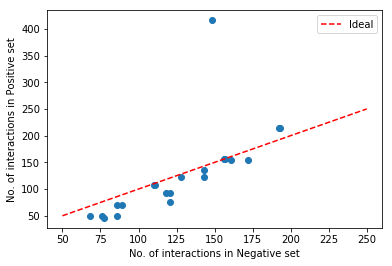

In [109]:
plt.scatter(Nx,Px)
plt.plot(np.linspace(50,250),np.linspace(50,250),'r--',label='Ideal')
plt.xlabel('No. of interactions in Negative set')
plt.ylabel('No. of interactions in Positive set')
plt.legend()

In [126]:
# Make final table
final_df = pd.DataFrame()
all_cyps = [i[0] for i in positive_pairs] + [i[0] for i in negative_pairs]
all_drugs = [i[1] for i in positive_pairs] + [i[1] for i in negative_pairs]
all_interactions = list(np.ones(len(positive_pairs))) + list(np.zeros(len(negative_pairs)))
final_df['CYP-Isoform'] = all_cyps
final_df['Drug Identifier'] = all_drugs
final_df['Interaction type'] = all_interactions

In [129]:
# Merge with other tables to get molecular descriptors
final_df = pd.merge(final_df,tableC,on='CYP-Isoform')
final_df = pd.merge(final_df,tableB,on='Drug Identifier')

In [141]:
# Remove unnecesary columns
del final_df['SMILES']
del final_df['PUBCHEM']
del final_df['Feature']

In [153]:
final_df

,CYP-Isoform,Drug Identifier,Interaction type,CYP,Isoform,[G1.1.1.1],[G1.1.1.2],[G1.1.1.3],[G1.1.1.4],[G1.1.1.5],...,EState_VSA10,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9
0,1A2-1,dinoprostone,1.0,1A2,1,6.019417,1.359223,4.466019,5.048544,6.407767,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
1,1A2-2,dinoprostone,1.0,1A2,2,6.007752,1.356589,4.457364,5.038760,6.395349,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
2,3A5-2,dinoprostone,0.0,3A5,2,3.571429,2.857143,2.857143,2.857143,2.857143,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
3,3A7-2,dinoprostone,0.0,3A7,2,3.738318,1.495327,4.859813,5.794393,6.542056,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
4,2C19-1,dinoprostone,0.0,2C19,1,3.469388,2.653061,4.897959,6.734694,6.734694,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
5,2B6-1,dinoprostone,0.0,2B6,1,5.498982,1.018330,4.073320,6.720978,7.942974,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
6,2C9-1,dinoprostone,0.0,2C9,1,3.673469,2.653061,4.285714,6.530612,6.530612,...,19.802129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,64.166667
7,1A2-1,aminophenazone,1.0,1A2,1,6.019417,1.359223,4.466019,5.048544,6.407767,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.567130,34.099537
8,1A2-2,aminophenazone,1.0,1A2,2,6.007752,1.356589,4.457364,5.038760,6.395349,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.567130,34.099537
9,2D6-1,aminophenazone,1.0,2D6,1,8.249497,1.207243,4.627767,6.036217,6.639839,...,4.794537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.567130,34.099537


In [142]:
final_df.to_csv('Table_E-Final_interaction_pairs.tab',sep='\t',index=False)

In [143]:
final_df.shape

(5312, 3054)

In [148]:
X = np.array(final_df.iloc[:,5:])
y = np.array(final_df['Interaction type'])

In [150]:
X.shape

(5312L, 3049L)

In [151]:
y.shape

(5312L,)

In [152]:
y

array([ 1.,  1.,  0., ...,  0.,  0.,  1.])